# Visualise annotated subcluster

In [9]:
from subsketch.io import read_compounds
from subsketch.loaders import load_mibig_bgc
from subsketch.bgc import draw_annotated_subcluster
from subsketch.molecule import draw_compounds, draw_compounds_with_substruct_flexible
from subsketch.html_helpers import generate_html_for_annotated_subcluster

from IPython.display import HTML, SVG, display
from pathlib import Path

In [10]:
# Input data
input_dir = Path("./example_data/")
gbks_dirpath = input_dir / "mibig_4.0_gbks"

mibig_compounds_filepath = input_dir / "mibig_4.0_compounds.tsv"
mibig_compounds = read_compounds(mibig_compounds_filepath)

In [ ]:

subcluster = {
    "id": "138",
    "bgc_id": "BGC0001059",
    "compound_name": "zwittermicin A",
    "substructure_name": "L-beta-Ureidoalanine",
    "substructure_class": "non-proteinogenic amino acid",
    "substructure_smiles": "NC(NC[C@H](N)C(O)=O)=O",
    "genes": ["zmaU", "zmaV", "zmaT"],
    "protein_ids": ["ACM79820.1", "ACM79821.1", "ACM79819.1"],
    "orig_seq": "FJ430564.1",
    "pathway_quality": "partially validated",
    "pubmed_id": ["19098220"],
}

In [12]:
bgc_id = subcluster["bgc_id"]
bgc_data = load_mibig_bgc(gbks_dirpath / f"{bgc_id}.gbk")
bgc_compounds = mibig_compounds.get(bgc_id, [])

gene_arrow_scaling = 60  # adjust based on BGC length
molecule_plot_scaling = 1.0 # adjust based on molecule size

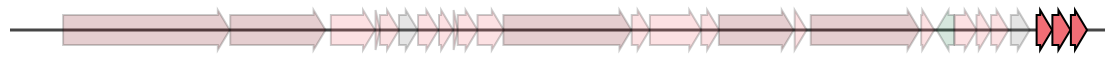

In [13]:
subcluster_svgstr = draw_annotated_subcluster(
    bgc_data=bgc_data,
    annotated_subcluster=subcluster,
    scaling=gene_arrow_scaling,
)
display(SVG(subcluster_svgstr))

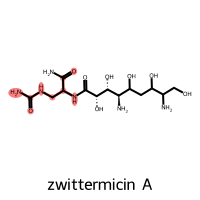

In [14]:
compounds_highlighted_svgstr = draw_compounds_with_substruct_flexible(
    compounds=bgc_compounds,
    substruct_smiles=subcluster["substructure_smiles"],
    show_names=True,
    scaling=molecule_plot_scaling
)
display(SVG(compounds_highlighted_svgstr))

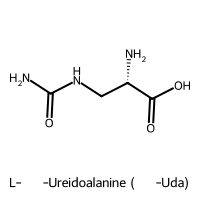

In [15]:
substructure_svgstr = draw_compounds(
    [(subcluster["substructure_name"], subcluster["substructure_smiles"])],
    show_names=True,
    scaling=molecule_plot_scaling,
)
display(SVG(substructure_svgstr))

# Full HTML report

In [16]:
html_content = generate_html_for_annotated_subcluster(
    subcluster=subcluster,
    bgc_data=bgc_data,
    compounds=bgc_compounds,
    scaling=gene_arrow_scaling,
)
display(HTML(html_content))

# save to file
output_filepath = Path(f"sc{subcluster['id']}.html")
with open(output_filepath, "w") as f:
    f.write(html_content)